Edit this markdown field to set your home directory

<base href="file:///E:\Universidade\Projects\Machine%20Learning%20Academy\GitRepos\workshops\02%20-%20Supervised%20Learning%20101\">

# Supervised Learning

Reiterating what we learned last session, supervised learning is the family of algorithms that given a training set are able to find a predictive model. 

This predictive model assigns a reference value, y, to a certain feature vector, x.

$ y = f(x) $

The supervised learning algorithms can be further divided into the class of classification and regression problems.




# Regression vs Classification



The distinction between regression and classification problems is concerned with the reference value, y.

In regression problems this reference value belongs to a continuous domain. For example, linear regression is concerned with finding a line that best explains the data. This line can be considered a predictive model, given a certain x it predicts a value for y.

<img src="img/regression.png" width="500">

In classification problems the reference value is discrete. For example, given a picture classifying what object is represented. The output will follow a discrete number of possible values, it is either a ship or a horse not a ship-horse.

<img src="img/classification.png" width="600">

In this workshop we will look at two classifier algorithms and in the next one we will look into regression models. The first algorithm we will look at is the Support Vector Machine model.

# Support Vector Machines

Support vector machines try to divide the space of training data with a hyperplane in such a way that it maximizes the distance between two classes.

<img src="img/svm.png" width="600">

Now that we understand the general idea lets see how we can implement this in Python!

# Time for some code!

<img src="img/code.gif" width="500">

For this example we will use the Iris dataset. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. 

<img src="img/iris.png" width="800">

We will start by loading and visualizing the dataset.


We will load the dataset using a handy library called Pandas. Loading the Iris dataset in this way it makes visualization and use much more flexible!

In [1]:
import pandas as pd

iris_dataframe = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/iris.csv")
iris_dataframe

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Now we can use the Seaborn library to visualize the dataset.

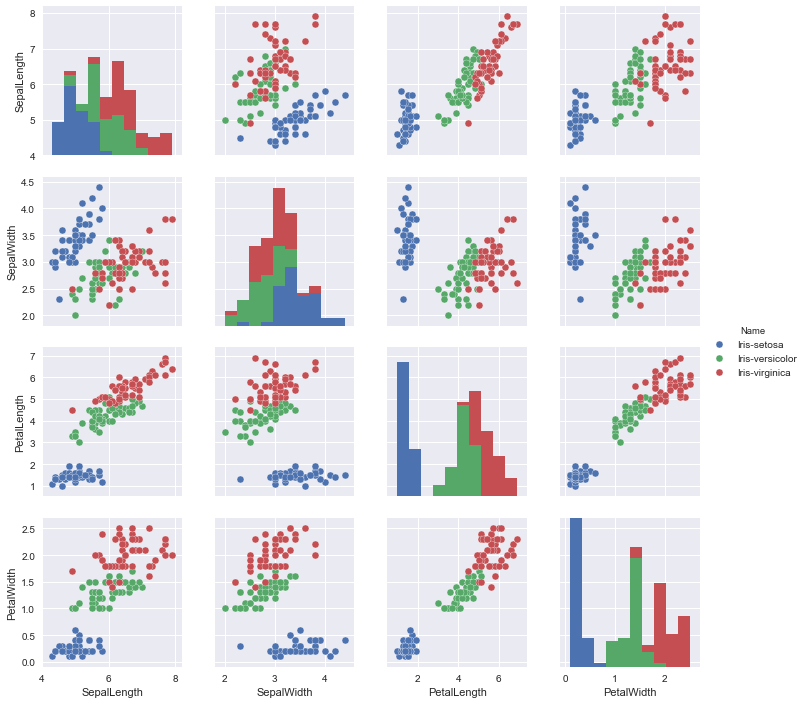

In [2]:
%matplotlib inline

import seaborn as sns

sns.pairplot(iris_dataframe, hue="Name")

From the visualization we can already see that it would be possible to separate the Setosa species from the other two species. 

So as an example of the classifier, we will train a model which is able to distinguish the Setose species from the other two species.

We start by importing the SVM classifier from the scikit learn library.

In [3]:
from sklearn.svm import SVC # "Support Vector Classifier"
classifier = SVC(kernel='linear')


Now that we have the classifier we can adjust its parameters, that is, train the model.

But first we need to prepare the training vector X and reference values Y and split the data into a training and test set which will allow us to avoid overfitting.

For the preprocessing we will use the preprocessing module in the scikit learn library.

In [23]:
y = iris_dataframe['Name']
X = iris_dataframe.drop("Name",1)

Next we will split the data into the training and test sets.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#  Training the model

<img src="img/training.jpg" width="200">

Now that all the pre processing and splitting is done training the model is as simple as: 

In [25]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
classifier.predict([[5.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)